In [9]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import os

block_metadata = pd.read_csv('block_metadata.csv')


# out directory
out_dir = 'synthetic_images/'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

for i in range(0, 14):
    #  create image 760x658
    width = 760
    height = 658
    img = Image.new('RGB', (width, height), color = 'white')
    draw = ImageDraw.Draw(img)

    # Draw head (oval)
    head_radius = 70  # Further increased size
    head_center = (width // 2, head_radius + 10)  # Positioned at the top with a little margin
    head_bbox = (head_center[0] - head_radius, head_center[1] - head_radius,
                head_center[0] + head_radius, head_center[1] + head_radius)
    draw.ellipse(head_bbox, fill=(0, 0, 0))  # Black


    #
    # Draw body (semicircle)
    body_radius = 140  # Adjusted radius for a fuller body
    body_center = (head_center[0], head_center[1] + head_radius + body_radius)
    body_bbox = (body_center[0] - body_radius, body_center[1] - body_radius,
                body_center[0] + body_radius, body_center[1])
    draw.pieslice(body_bbox, 180, 360, fill=(0, 0, 0))

    # Extend the rectangle below the body semicircle
    rect_width = 2 * body_radius
    rect_height = 60
    rect_left = body_center[0] - body_radius
    rect_top = body_center[1] - 70
    rect_bbox = (rect_left, rect_top, rect_left + rect_width, rect_top + rect_height)
    draw.rectangle(rect_bbox, fill=(0, 0, 0))

                    
    # Draw table (rectangle)
    table_width = 700
    table_height = 300
    table_left = (width - table_width) // 2
    table_top = height - table_height - 10
    table_bbox = (table_left, table_top, table_left + table_width, table_top + table_height)
    draw.rectangle(table_bbox, outline=(0, 0, 0))

    for j in range(i*15, i*15 + 15):
        x = block_metadata['x'][j]
        y = block_metadata['y'][j]
        color = block_metadata['color'][j]
        draw.rectangle([x, y, x+25, y+25], fill = color)

        # write block_id on the block
        block_id = block_metadata['block_id'][j]
        # calculate center of the block
        draw.text((x+7, y+7), str(block_id), fill=(255, 255, 255), stroke_fill=(0, 0, 0), stroke_width=1)
        

    img.save(out_dir + 'synthetic_image_' + str(i + 1) + '.png')

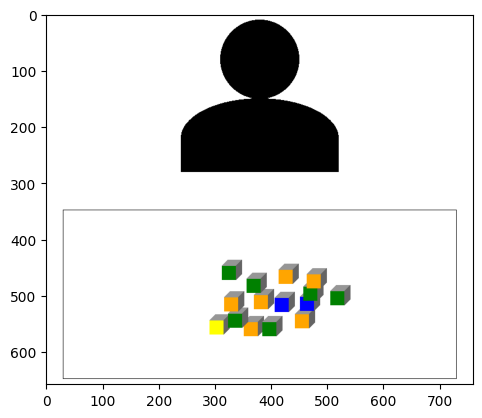

In [38]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import os

block_metadata = pd.read_csv('block_metadata.csv')

# Create image 760x658
width = 760
height = 658
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Draw head (oval)
head_radius = 70
head_center = (width // 2, head_radius + 10)
head_bbox = (head_center[0] - head_radius, head_center[1] - head_radius,
             head_center[0] + head_radius, head_center[1] + head_radius)
draw.ellipse(head_bbox, fill=(0, 0, 0))  # Black

# Draw body (semicircle)
body_radius = 140
body_center = (head_center[0], head_center[1] + head_radius + body_radius)
body_bbox = (body_center[0] - body_radius, body_center[1] - body_radius,
             body_center[0] + body_radius, body_center[1])
draw.pieslice(body_bbox, 180, 360, fill=(0, 0, 0))

# Extend the rectangle below the body semicircle
rect_width = 2 * body_radius
rect_height = 60
rect_left = body_center[0] - body_radius
rect_top = body_center[1] - 70
rect_bbox = (rect_left, rect_top, rect_left + rect_width, rect_top + rect_height)
draw.rectangle(rect_bbox, fill=(0, 0, 0))

# Draw table (rectangle)
table_width = 700
table_height = 300
table_left = (width - table_width) // 2
table_top = height - table_height - 10
table_bbox = (table_left, table_top, table_left + table_width, table_top + table_height)
draw.rectangle(table_bbox, outline=(0, 0, 0))

# Define function to draw 3D rectangle
def draw_3d_rectangle(draw, bbox, color):
    # Draw front face
    draw.polygon([(bbox[0], bbox[1]), (bbox[2], bbox[1]), (bbox[2], bbox[3]), (bbox[0], bbox[3])], fill=color)
    # Draw top face
    draw.polygon([(bbox[0], bbox[1]), (bbox[0] + 10, bbox[1] - 10), (bbox[2] + 10, bbox[1] - 10), (bbox[2], bbox[1])], fill=(150, 150, 150))
    # Draw right face
    draw.polygon([(bbox[2], bbox[1]), (bbox[2] + 10, bbox[1] - 10), (bbox[2] + 10, bbox[3] - 10), (bbox[2], bbox[3])], fill=(100, 100, 100))

# Draw 3D cubes
for i in range(len(block_metadata)):
    if block_metadata['img_config'][i] != 1:
        continue
    x = block_metadata['x'][i]
    y = block_metadata['y'][i]
    color = block_metadata['color'][i]

    # Define cube dimensions
    cube_size = 25
    cube_depth = 15

    # Calculate cube coordinates
    cube_bbox = (x, y, x + cube_size, y + cube_size)

    # Draw 3D cube
    draw_3d_rectangle(draw, cube_bbox, color)

# Show image
plt.imshow(img)
